# 5-Class CNN
The following notebook reuses the best model from the 3-class CNN to predict classes in all five image categories, `explicit` `neutral`, `sexy`, `breastfeeding`, and `violent`.

In [1]:
# Mount google drive to notebook to pull pickle files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# Import libraries
import time, scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, recall_score, f1_score, precision_score, accuracy_score
 
# Modeling libraries
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Activation, Conv2D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import pickle
import keras

In [18]:
# Open Pickle files containing train, test, val data
infile = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X.pickle','rb')
X = pickle.load(infile)

infile2 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y.pickle','rb')
y = pickle.load(infile2)

infile5 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_val.pickle','rb')
X_val = pickle.load(infile5)

infile6 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_val.pickle','rb')
y_val = pickle.load(infile6)


# Import new classes to append to X and y
infile3 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_extra.pickle','rb')
X_extra = pickle.load(infile3)

infile4 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_extra.pickle','rb')
y_extra = pickle.load(infile4)

infile7 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_val_extra.pickle','rb')
X_val_extra = pickle.load(infile7)

infile8 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_val_extra.pickle','rb')
y_val_extra = pickle.load(infile8)

In [24]:
# Replace breastfeeding (0) with class number 3 and violence (1), with class number 4 before appending to y
y_extra_num = np.where(y_extra == 0, 3, 4) 
y_extra_num[:5]

array([3, 3, 4, 3, 3])

In [25]:
# Replace breastfeeding (0) with class number 3 and violence (1), with class number 4 before appending to y
y_val_extra_num = np.where(y_val_extra == 0, 3, 4) 
y_val_extra_num[:5]

array([3, 3, 3, 4, 3])

In [26]:
# Concatenate X and y values for train and validation data to create new arrays
X_new = np.concatenate((X, X_extra), axis=0)
y_new = np.concatenate((y, y_extra_num), axis=0)

X_val_new = np.concatenate((X_val, X_val_extra), axis=0)
y_val_new = np.concatenate((y_val, y_val_extra_num), axis=0)

print(f'X_new Size: {len(X_new)}')
print(f'y_new Size: {len(y_new)}')
print(f'X_val_new Size: {len(X_val_new)}')
print(f'y_val_new Size: {len(y_val_new)}')

X_new Size: 65267
y_new Size: 65267
X_val_new Size: 9299
y_val_new Size: 9299


In [34]:
# Shuffle X and y
X, y = shuffle(X_new, y_new)
X_val, y_val = shuffle(X_val_new, y_val_new)

In [28]:
# Data Augmentation with horizonatal and vertical flips
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
model = Sequential([ # Model steps are performed one after another rather than at the same time
  data_augmentation, # Apply data augmentation to the model
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2) 
]) # Max pooling to reduce noise and calculate the maximum value in each patch of each feature map

model.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1)) # More max pooling, decreased stride
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1)) # More max pooling, decreased stride
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1)) # More max pooling, decreased stride
model.add(layers.Flatten()) # Transform features into a single column
model.add(layers.Dense(128, activation='relu')) # First hidden layer
model.add(layers.Dense(72, activation='relu')) # Second hidden layer
model.add(layers.Dense(64, activation='relu')) # Third hidden layer
model.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model.add(layers.Dense(8, activation='relu')) # Fifth hidden layer
model.add(layers.Dense(3, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
opt = SGD(learning_rate=0.06) # Small learning rate to avoid overfitting
model.compile(loss = 'sparse_categorical_crossentropy', # Sparse_categorical_crossentropy because the labels are not one hot encoded, and to reduce comp time
               optimizer = opt, 
               metrics=['accuracy'])

# Fit and score model performance
model_score = model.fit(X,
                        y, # Fit on training data
                        epochs=50,
                        validation_split=0.2) # Validation split of X and y to check for over/under fitting

Epoch 1/50
1632/1632 [==============================] - 480s 294ms/step - loss: 1.0125 - accuracy: 0.5347 - val_loss: 0.9613 - val_accuracy: 0.5816
Epoch 2/50
1632/1632 [==============================] - 438s 269ms/step - loss: 0.9463 - accuracy: 0.5917 - val_loss: 0.9403 - val_accuracy: 0.6032
Epoch 3/50
1632/1632 [==============================] - 426s 261ms/step - loss: 0.9006 - accuracy: 0.6244 - val_loss: 0.8620 - val_accuracy: 0.6535
Epoch 4/50
1632/1632 [==============================] - 415s 254ms/step - loss: 0.8639 - accuracy: 0.6443 - val_loss: 0.8442 - val_accuracy: 0.6567
Epoch 5/50
1632/1632 [==============================] - 413s 253ms/step - loss: 0.8216 - accuracy: 0.6678 - val_loss: 0.7974 - val_accuracy: 0.6882
Epoch 6/50
1632/1632 [==============================] - 417s 255ms/step - loss: 0.7962 - accuracy: 0.6808 - val_loss: 0.8480 - val_accuracy: 0.6570
Epoch 7/50
1632/1632 [==============================] - 414s 254ms/step - loss: 0.7761 - accuracy: 0.6904 - val_

In [38]:
# Evaluate on unseen data
model.evaluate(X_val, y_val)

291/291 [==============================] - 13s 43ms/step - loss: 0.5368 - accuracy: 0.8017


[0.5368491411209106, 0.8016991019248962]

In [63]:
print(f'This model has a 80.2% Accuracy')

This model has a 80.2% Accuracy


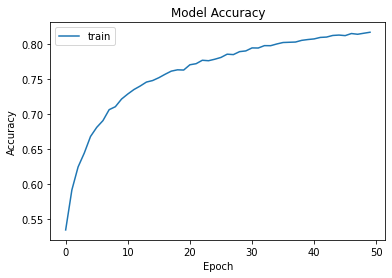

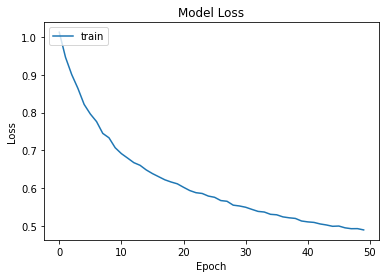

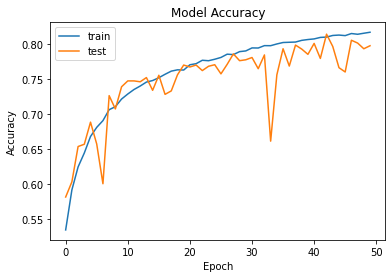

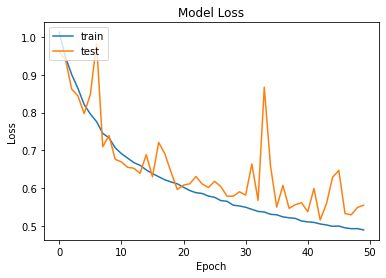

In [48]:
# View the change in accuracy and loss with each epoch

# summarize history for accuracy
plt.plot(model_score.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_score.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_score.history['accuracy'])
plt.plot(model_score.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_score.history['loss'])
plt.plot(model_score.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Calculate predicted values
y_pred = model.predict(X_val)
# Convert predicted 3-d array into 1-d array
y_pred = np.argmax(y_pred, axis=1)
# Convert numpy arrays to pandas series
y_actu = pd.Series(y_val, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')


# Print confusion matrix
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted     0     1     2  3   All
Actual                              
0          3697   452   319  0  4468
1           315  3073   143  1  3532
2           243   326   680  0  1249
3            15     6     4  5    30
4             2    14     4  0    20
All        4272  3871  1150  6  9299


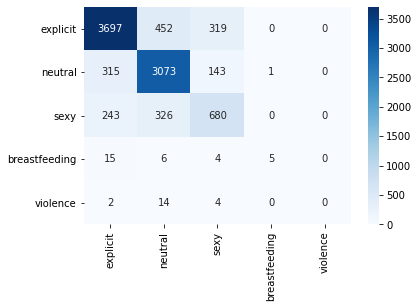

In [42]:
# Plot confusion matrix
conf = confusion_matrix(y_actu, y_pred)
labels = ['explicit', 'neutral' ,'sexy', 'breastfeeding', 'violence']
sns.heatmap(conf, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels);

In [46]:
# Print classification report
print(classification_report(y_val ,y_pred, target_names=labels))

               precision    recall  f1-score   support

     explicit       0.87      0.83      0.85      4468
      neutral       0.79      0.87      0.83      3532
         sexy       0.59      0.54      0.57      1249
breastfeeding       0.83      0.17      0.28        30
     violence       0.00      0.00      0.00        20

     accuracy                           0.80      9299
    macro avg       0.62      0.48      0.50      9299
 weighted avg       0.80      0.80      0.80      9299



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Calculate predicted values
y_pred2 = model.predict(X)
# Convert predicted 3-d array into 1-d array
y_pred2 = np.argmax(y_pred2, axis=1)
# Convert numpy arrays to pandas series
y_actu2 = pd.Series(y, name='Actual')
y_pred2 = pd.Series(y_pred2, name='Predicted')


# Print confusion matrix
df_confusion2 = pd.crosstab(y_actu2, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion2)

Predicted      0      1     2   3  4    All
Actual                                     
0          26019   3030  2208   0  0  31257
1           1924  21898   875   1  1  24699
2           1682   2372  4687   1  0   8742
3            208     94    56  32  0    390
4             28    149     1   1  0    179
All        29861  27543  7827  35  1  65267


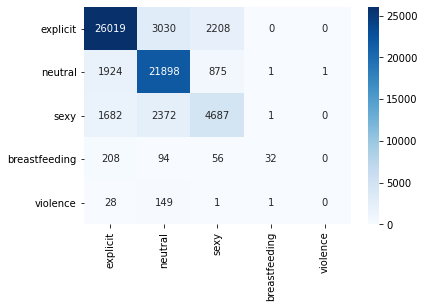

In [44]:
# Plot confusion matrix
conf2 = confusion_matrix(y_actu2, y_pred2)
sns.heatmap(conf2, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels);

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 90, 90, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 88, 88, 48)        480       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 44, 44, 48)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 42, 42, 48)        20784     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 41, 41, 48)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 39, 39, 32)        13856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 38, 38, 32)       

### Model Analysis
Model accuracy has decreased by only 1% from the [3-class model]('02_best_3_class_model.ipynb'), but when you take a closer look nearly every `violent` and `breastfeeding`. `Breastfeeding` photos are being primarily missclasified because many of them show the mothers nipple while nursing. The `violent` images are primarily missclassified as `neutral`, which is alarming because having scraped the images myself, I know that they depict violent crime scenes and deceased bodies which is not something that a normal person would want to see on their newsfeed on any given day. I will need to better account for the massive class imbalance in future models.

# Modeling On Downsampled Data
The images have been downsampled, ranging from 200-300 per class to better account for the imbalanced data. The datset in the following models uses only 2% of all photos.

In [51]:
# Open Pickle files containing downsampled data
infile9 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_down.pickle','rb')
X_down = pickle.load(infile9)

infile10 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_down.pickle','rb')
y_down = pickle.load(infile10)

infile11 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_val_down.pickle','rb')
X_val_down = pickle.load(infile11)

infile12 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_val_down.pickle','rb')
y_val_down = pickle.load(infile12)

In [52]:
# Reused best CNN model
model2 = Sequential([ # Model steps are performed one after another rather than at the same time
  data_augmentation,
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2)
])

model2.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(pool_size=2, strides=1))
model2.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(pool_size=2, strides=1))
model2.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(pool_size=2, strides=1))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu')) # First hidden layer
model2.add(layers.Dense(72, activation='relu')) # Second hidden layer
model2.add(layers.Dense(64, activation='relu')) # Third hidden layer
model2.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model2.add(layers.Dense(8, activation='relu')) # Fifth hidden layer
model2.add(layers.Dense(5, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = opt,
               metrics=['accuracy'])

# Fit and score model performance
model_score2 = model2.fit(X_down,
                          y_down,
                          epochs=50,
                          validation_split=0.2)

Epoch 1/50
37/37 [==============================] - 11s 263ms/step - loss: 1.5950 - accuracy: 0.2431 - val_loss: 1.5922 - val_accuracy: 0.2131
Epoch 2/50
37/37 [==============================] - 10s 261ms/step - loss: 1.5841 - accuracy: 0.2422 - val_loss: 1.5723 - val_accuracy: 0.3127
Epoch 3/50
37/37 [==============================] - 10s 258ms/step - loss: 1.5733 - accuracy: 0.2681 - val_loss: 1.5964 - val_accuracy: 0.2062
Epoch 4/50
37/37 [==============================] - 10s 258ms/step - loss: 1.5705 - accuracy: 0.2759 - val_loss: 1.5857 - val_accuracy: 0.2062
Epoch 5/50
37/37 [==============================] - 10s 258ms/step - loss: 1.5610 - accuracy: 0.2940 - val_loss: 1.5596 - val_accuracy: 0.3368
Epoch 6/50
37/37 [==============================] - 9s 256ms/step - loss: 1.5695 - accuracy: 0.2767 - val_loss: 1.5717 - val_accuracy: 0.3299
Epoch 7/50
37/37 [==============================] - 9s 254ms/step - loss: 1.5658 - accuracy: 0.2664 - val_loss: 1.5620 - val_accuracy: 0.3230
E

### Model Analysis
The same neural netwrok model on a much smaller dataset reaches an accuracy of only 43% and is still overfitting. I will try the same model with decreased dense layers to guage performance

In [53]:
# Reused model with 3 less dense layers
model3 = Sequential([
  data_augmentation,
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X_down.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2)
])

model3.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model3.add(layers.MaxPool2D(pool_size=2, strides=2))
model3.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(layers.MaxPool2D(pool_size=2, strides=2))
model3.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(layers.MaxPool2D(pool_size=2, strides=2))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu')) # Third hidden layer
model3.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model3.add(layers.Dense(5, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = opt,
               metrics=['accuracy'])

# Fit and score model performance
model_score3 = model3.fit(X_down,
                          y_down,
                          epochs=50,
                          validation_split=0.2)

Epoch 1/50
37/37 [==============================] - 7s 159ms/step - loss: 1.5891 - accuracy: 0.2509 - val_loss: 1.5680 - val_accuracy: 0.3127
Epoch 2/50
37/37 [==============================] - 6s 152ms/step - loss: 1.5715 - accuracy: 0.2698 - val_loss: 1.5592 - val_accuracy: 0.3127
Epoch 3/50
37/37 [==============================] - 6s 155ms/step - loss: 1.5617 - accuracy: 0.2845 - val_loss: 1.5437 - val_accuracy: 0.3127
Epoch 4/50
37/37 [==============================] - 6s 156ms/step - loss: 1.5540 - accuracy: 0.2948 - val_loss: 1.6208 - val_accuracy: 0.2062
Epoch 5/50
37/37 [==============================] - 6s 157ms/step - loss: 1.5547 - accuracy: 0.2862 - val_loss: 1.6465 - val_accuracy: 0.2062
Epoch 6/50
37/37 [==============================] - 6s 157ms/step - loss: 1.5597 - accuracy: 0.2802 - val_loss: 1.5625 - val_accuracy: 0.3162
Epoch 7/50
37/37 [==============================] - 6s 159ms/step - loss: 1.5438 - accuracy: 0.2948 - val_loss: 1.6515 - val_accuracy: 0.2027
Epoch 

### Model Analysis
The above model with decreased hidden layers performs about the same as the prio model in 50 epochs and is still overfitting. Because it is learning so slowly, the next model will increase the learning rate to 0.09.

In [58]:
# Reused model with increased learning rate
model4 = Sequential([
  data_augmentation,
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X_down.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2)
])

model4.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # Third hidden layer
model.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model.add(layers.Dense(5, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
opt2 = SGD(learning_rate=0.09) 
model4.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = opt2,
               metrics=['accuracy'])

# Fit and score model performance
model_score4 = model4.fit(X_down,
                          y_down,
                          epochs=50,
                          validation_split=0.05)

Epoch 1/50
44/44 [==============================] - 7s 142ms/step - loss: 3.9500 - accuracy: 0.0319 - val_loss: 3.8067 - val_accuracy: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 6s 137ms/step - loss: 3.8068 - accuracy: 0.0269 - val_loss: 3.8067 - val_accuracy: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 6s 137ms/step - loss: 3.8066 - accuracy: 0.0247 - val_loss: 3.8067 - val_accuracy: 0.0000e+00
Epoch 4/50
44/44 [==============================] - 6s 137ms/step - loss: 3.8065 - accuracy: 0.0305 - val_loss: 3.8060 - val_accuracy: 0.0000e+00
Epoch 5/50
44/44 [==============================] - 6s 139ms/step - loss: 3.8072 - accuracy: 0.0254 - val_loss: 3.8066 - val_accuracy: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 6s 139ms/step - loss: 3.8067 - accuracy: 0.0269 - val_loss: 3.8064 - val_accuracy: 0.0000e+00
Epoch 7/50
44/44 [==============================] - 6s 139ms/step - loss: 3.8060 - accuracy: 0.0254 - val_loss: 3.8049 - val

### Model Accuracy
The increased learning rate had the opposite effect, and the model is not matching any of the unseen validation data correctly. I will increase the image size up to (521 x 521) to see if this has any impact on learning.

In [61]:
# Open Pickle files containing downsampled data with larger image size
infile13 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_down_521.pickle','rb')
X_down_521 = pickle.load(infile13)

infile14 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_down_521.pickle','rb')
y_down_521 = pickle.load(infile14)

infile15 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_val_down_521.pickle','rb')
X_val_down_521 = pickle.load(infile15)

infile16 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_val_down_521.pickle','rb')
y_val_down_521 = pickle.load(infile16)

In [62]:
# Reused model with increased image size
model2 = Sequential([
  data_augmentation,
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2)
])

model2.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(pool_size=2, strides=1))
model2.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(pool_size=2, strides=1))
model2.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(pool_size=2, strides=1))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu')) # First hidden layer
model2.add(layers.Dense(72, activation='relu')) # Second hidden layer
model2.add(layers.Dense(64, activation='relu')) # Third hidden layer
model2.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model2.add(layers.Dense(8, activation='relu')) # Fifth hidden layer
model2.add(layers.Dense(5, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = opt,
               metrics=['accuracy'])

# Fit and score model performance
model_score2 = model2.fit(X_down_521,
                          y_down_521,
                          epochs=50,
                          validation_split=0.2)

Epoch 1/50
37/37 [==============================] - 342s 9s/step - loss: 1.6079 - accuracy: 0.2397 - val_loss: 1.5916 - val_accuracy: 0.2715
Epoch 2/50
37/37 [==============================] - 349s 9s/step - loss: 1.5782 - accuracy: 0.2457 - val_loss: 1.5840 - val_accuracy: 0.2715
Epoch 3/50
37/37 [==============================] - 334s 9s/step - loss: 1.5739 - accuracy: 0.2690 - val_loss: 1.5912 - val_accuracy: 0.2234
Epoch 4/50
37/37 [==============================] - 345s 9s/step - loss: 1.5712 - accuracy: 0.2534 - val_loss: 1.5869 - val_accuracy: 0.2715
Epoch 5/50
37/37 [==============================] - 333s 9s/step - loss: 1.5716 - accuracy: 0.2750 - val_loss: 1.5859 - val_accuracy: 0.2715
Epoch 6/50
37/37 [==============================] - 337s 9s/step - loss: 1.5712 - accuracy: 0.2681 - val_loss: 1.6259 - val_accuracy: 0.2715
Epoch 7/50
37/37 [==============================] - 333s 9s/step - loss: 1.5718 - accuracy: 0.2681 - val_loss: 1.5870 - val_accuracy: 0.2715
Epoch 8/50
37

#### Model Analysis
Increasing the image size to (521 x 521) did not counteract the effects the downsampling had on model performance. Further modeling will be needed outside the scope of this project to better account for the class imbalance.

### Downsampling Analysis
It is possible that with continued modeling and trial and error that the downsampled dataset could perform as well as the imbalanced dataset. It is also possible that there is just not enough data overall to differentiate between the 5 classes. Based on my understanding of the images and the model performance on the imbalanced dataset I'd hypothesize that the latter is true due to the similarities between image classes.

#### Next Steps

1) Oversampling: This will likley cause the greatest increase in my models accuracy, but it will be difficult to source the `violent` and `breastfeeding` image classes online.

2) Adjust Class Weights: This will require some trial and error to find optimal class weights in the `breastfeeding` and `violent` categories.